In [1]:
import numpy as np
import pandas as pd 

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
test_data["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [7]:
#test_data.drop_duplicates(inplace = True)

In [8]:
test_data.shape

(1459, 80)

In [9]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
test_data["LotFrontage"].unique

<bound method Series.unique of 0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64>

In [12]:
test_data["LotFrontage"].fillna(test_data["LotFrontage"].mean(), inplace=True)

In [13]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [14]:
test_data["Alley"].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [15]:
#test_data.drop(["Alley"] ,inplace= True, axis=1)

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [17]:
test_data["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Po', 'Fa', 'Ex'], dtype=object)

In [18]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Getting Insights from training Dataset

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'SalePrice')

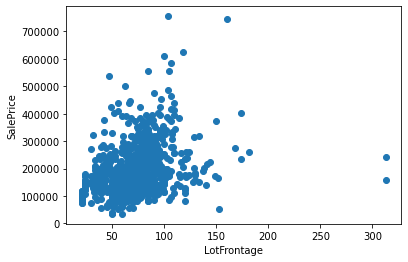

In [22]:
plt.scatter(train_data.LotFrontage, train_data.SalePrice)
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

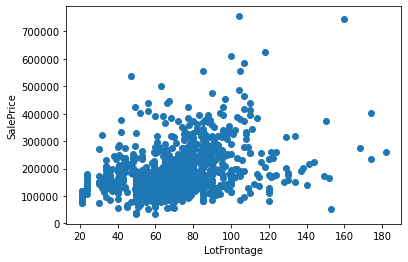

In [23]:
# Removing outliers 
train_data = train_data.drop(train_data[(train_data["LotFrontage"]>200) & (train_data["SalePrice"]<500000)].index)
plt.scatter(train_data.LotFrontage, train_data.SalePrice)
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

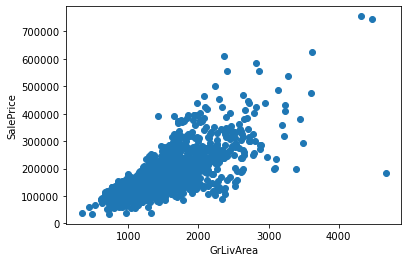

In [24]:
plt.scatter(train_data.GrLivArea, train_data.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

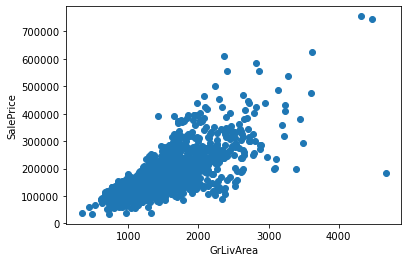

In [25]:
# Removing outliers 
train_data = train_data.drop(train_data[(train_data["LotFrontage"]>4000) & (train_data["SalePrice"]<300000)].index)
plt.scatter(train_data.GrLivArea, train_data.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

In [26]:
train_data.shape

(1458, 81)

In [27]:
# Now lets analyse the SalePrice Variable
from scipy import stats
from scipy.stats import norm, skew

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180893.65 and sigma = 79451.75



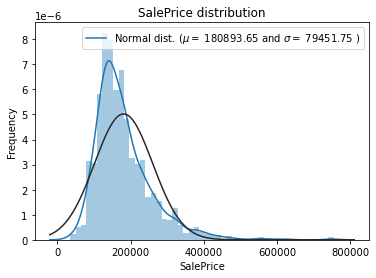

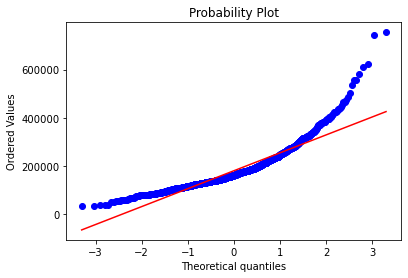

In [28]:
sns.distplot(train_data["SalePrice"], fit=norm)
(mu, sigma) = norm.fit(train_data["SalePrice"])
print("\n mu = {:.2f} and sigma = {:.2f}\n". format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [29]:
# We use numpy function loglp which applies log(1+x) to all elements of the columns
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



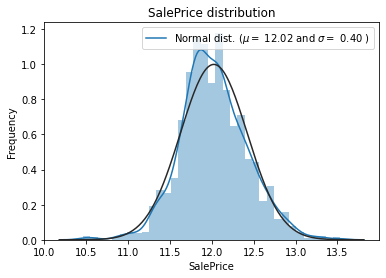

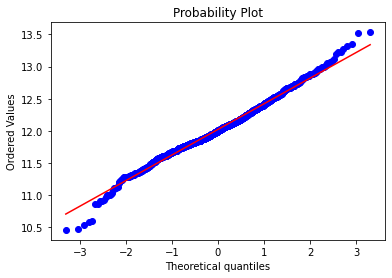

In [30]:
# Check the new distribution
sns.distplot(train_data["SalePrice"], fit= norm);
(mu, sigma) = norm.fit(train_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [31]:
train_data.shape, test_data.shape

((1458, 81), (1459, 80))

In [32]:
#Save the 'Id' column
train_ID = train_data['Id']
test_ID = test_data['Id']

print("train shape before dropping id: {}".format(train_data.shape))
print("test shape before dropping id: {}".format(test_data.shape))

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

print("train shape after dropping id: {}".format(train_data.shape))
print("test shape after dropping id: {}".format(test_data.shape))

train shape before dropping id: (1458, 81)
test shape before dropping id: (1459, 80)
train shape after dropping id: (1458, 80)
test shape after dropping id: (1459, 79)


Text(0, 0.5, 'SalePrice')

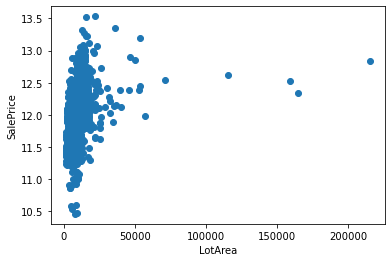

In [33]:
# We will are not going to remove outliers from every feature as it may affect the model since test set will have outliers too
# and our model needs to be robust against them
# Analysing the LotArea Feature against SalePrice
plt.scatter(train_data.LotArea, train_data.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
# it shows outliers in it

In [34]:
# Analysing the OverallQual feature to draw pie chart
train_data['OverallQual'].value_counts()

5     397
6     374
7     318
8     168
4     116
9      43
3      20
10     17
2       3
1       2
Name: OverallQual, dtype: int64

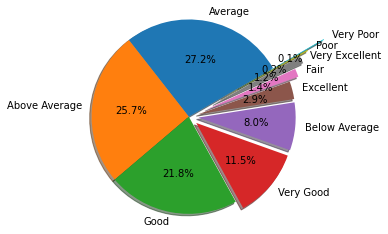

In [35]:
labels = ['Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' ]
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
ax.pie(train_data['OverallQual'].value_counts(), explode=explode,
       labels=labels, autopct='%1.1f%%', shadow=True, startangle=30)
ax.axis('equal')
plt.show()

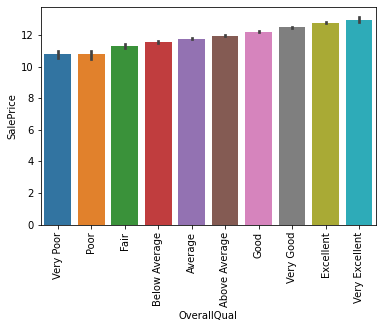

In [36]:
# Analysing OverallQual against SalePrice in barplot
import seaborn as sns
fig = sns.barplot(x='OverallQual', y='SalePrice', data=train_data)
fig.set_xticklabels(labels=['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good',
                            'Very Good', 'Excellent', 'Very Excellent'], rotation=90);

In [37]:
# Analysing FOundation feature for pie chart
train_data['Foundation'].value_counts()

PConc     646
CBlock    633
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

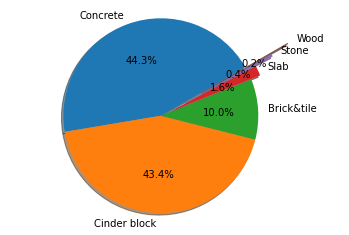

In [38]:
labels = ['Concrete', 'Cinder block', 'Brick&tile', 'Slab', 'Stone', 'Wood']
explode = (0, 0.0, 0.0, 0.1, 0.3, 0.5)

fig, ax = plt.subplots()
ax.pie(train_data['Foundation'].value_counts(), explode=explode,
       labels=labels, autopct='%1.1f%%', shadow=True, startangle=30)
ax.axis('equal')
plt.show()

Text(0.5, 0, 'Types of Foundation')

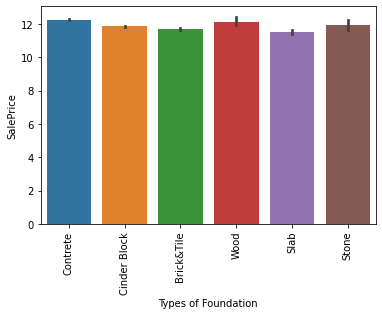

In [39]:
# Analysing FOundation against SalePrice for barplot
fig1=sns.barplot(x='Foundation', y='SalePrice', data=train_data)
fig1.set_xticklabels(labels=['Contrete', 'Cinder Block', 'Brick&Tile', 'Wood', 'Slab', 'Stone'], rotation=90)
plt.xlabel("Types of Foundation")

In [40]:
# Analysing GarageCars against SalePrice from dataframe to use it in barplot
check = train_data[['GarageCars', 'SalePrice']]
check

,GarageCars,SalePrice
0,2,12.247699
1,2,12.109016
2,2,12.317171
3,3,11.849405
4,3,12.429220
...,...,...
1455,2,12.072547
1456,2,12.254868
1457,1,12.493133
1458,1,11.864469


In [41]:
# Creating pivot table to check GarageCars against SalePrice using aggregate function
pd.pivot_table(check, values='SalePrice', index=['GarageCars'], aggfunc=np.sum)

,SalePrice
GarageCars,
0,930.842693
1,4329.062356
2,9932.522609
3,2277.630488
4,60.686019


Text(0.5, 0, 'No of cars in garage')

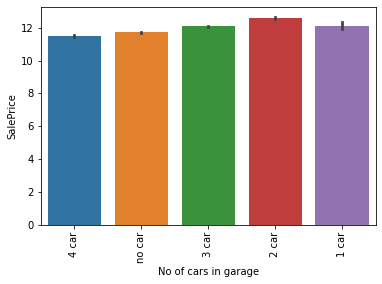

In [42]:
fig = sns.barplot(x='GarageCars', y='SalePrice', data=train_data)
fig.set_xticklabels(labels=['4 car', 'no car', '3 car', '2 car', '1 car'], rotation=90)
plt.xlabel('No of cars in garage')

In [43]:
# Checking max value count for each value to use it in plot
train_data['Fireplaces'].value_counts()

0    690
1    649
2    115
3      4
Name: Fireplaces, dtype: int64

Text(0.5, 0, 'No of fireplace')

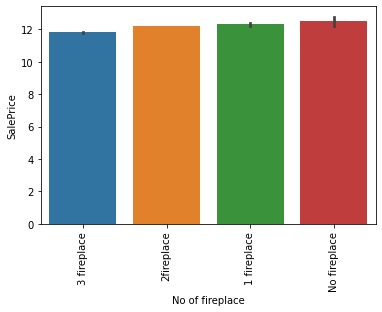

In [44]:
# Analysing Fireplaces against SalePrice
fig2 = sns.barplot(x='Fireplaces', y='SalePrice', data=train_data)
fig2.set_xticklabels(labels=['3 fireplace', '2fireplace', '1 fireplace', 'No fireplace'], rotation=90)
plt.xlabel('No of fireplace')

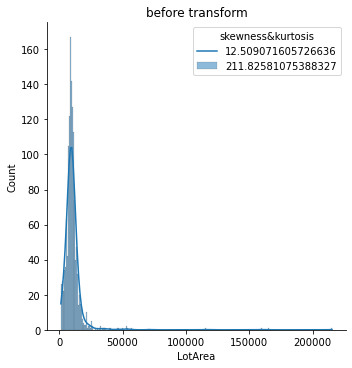

In [45]:
#Analysing the skewness and kurtosis of some features to understand the variation of the data</h1>
# Using displot instead of distplot which is deprecating in next version
sns.displot(x='LotArea', data=train_data, kde=True)
skew_ness = str(train_data['LotArea'].skew())
kurt_ = str(train_data['LotArea'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title("before transform")
plt.show()

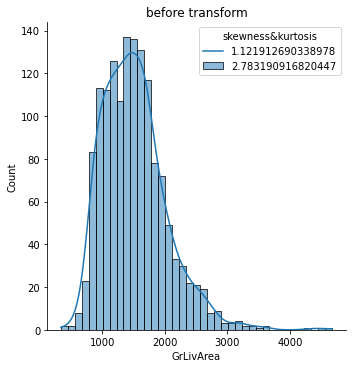

In [46]:
sns.displot(x='GrLivArea', data=train_data, kde=True)
skew_ness=str(train_data['GrLivArea'].skew())
kurt_=str(train_data['GrLivArea'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()

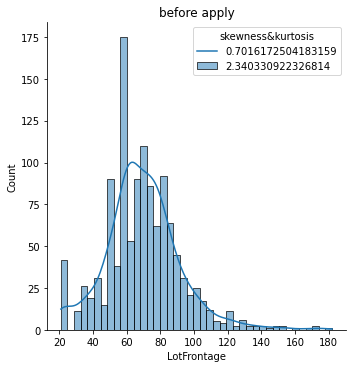

In [47]:
sns.displot(x=train_data['LotFrontage'],kde=True)
skew_ness = str(train_data['LotFrontage'].skew())
kurt_ = str(train_data['LotFrontage'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before apply')
plt.show()

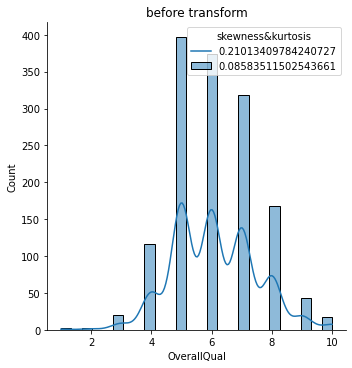

In [48]:
sns.displot(x='OverallQual', data=train_data, kde=True)
skew_ness = str(train_data['OverallQual'].skew())
kurt_ = str(train_data['OverallQual'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title("before transform")
plt.show()

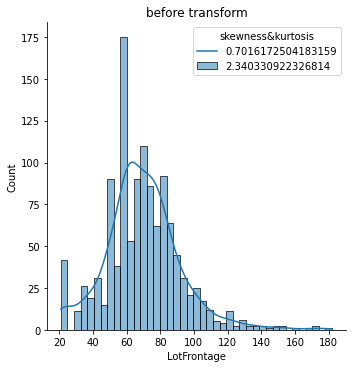

In [49]:
sns.displot(x='LotFrontage', data=train_data, kde=True)
skew_ness = str(train_data['LotFrontage'].skew())
kurt_ = str(train_data['LotFrontage'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()

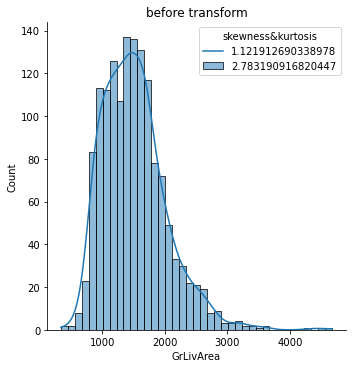

In [50]:
sns.displot(x='GrLivArea', data=train_data, kde=True)
skew_ness = str(train_data['GrLivArea'].skew())
kurt_ = str(train_data['GrLivArea'].kurt())
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()

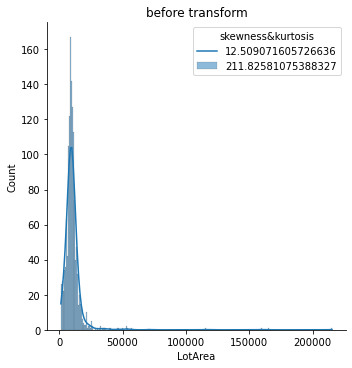

In [51]:
sns.displot(x='LotArea', data=train_data, kde=True)
skew_ness = str(train_data['LotArea'].skew())
kurt_ = str(train_data['LotArea'].kurt()) 
plt.legend([skew_ness, kurt_], title='skewness&kurtosis')
plt.title('before transform')
plt.show()

In [52]:
# Saving the length of train and test and concatenating to make a single df
train_range = train_data.shape[0]  # 1458
test_range = test_data.shape[0]  # 1459
y_train = train_data.SalePrice.values # saving target variable
total_data = pd.concat((train_data, test_data)).reset_index(drop=True)

In [53]:
# shape of total_data
total_data.shape

(2917, 80)

In [54]:
# dropping target variable
total_data.drop(['SalePrice'], axis=1, inplace=True)
print("total_data size is : {}".format(total_data.shape))
total_data.head()

total_data size is : (2917, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [55]:
# Counting unique value in each categorical column
cat_col =total_data.select_dtypes(include=['object'])

for i in list(cat_col.columns):
    print("We have {} unique value in {} column: {}.".format(len(cat_col[i].unique()), 
                                                     i, cat_col[i].unique()))
    print('*'*140)

We have 6 unique value in MSZoning column: ['RL' 'RM' 'C (all)' 'FV' 'RH' nan].
********************************************************************************************************************************************
We have 2 unique value in Street column: ['Pave' 'Grvl'].
********************************************************************************************************************************************
We have 3 unique value in Alley column: [nan 'Grvl' 'Pave'].
********************************************************************************************************************************************
We have 4 unique value in LotShape column: ['Reg' 'IR1' 'IR2' 'IR3'].
********************************************************************************************************************************************
We have 4 unique value in LandContour column: ['Lvl' 'Bnk' 'Low' 'HLS'].
**********************************************************************************************

In [56]:
# divide data into categorical and numerical features
cat, num = [], []
for i in total_data.columns:
    d = total_data.dtypes[i]
    if d == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: {}".format(cat))
print("Numerical: {}".format(num))

Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'

In [57]:
# Checking length of categorical and numerical
print("Length of categorical: {}".format(len(cat)))
print("Length of numerical: {}".format(len(num)))

Length of categorical: 43
Length of numerical: 36


In [58]:
# Checking unique in catgeorical column by using our categorical list
for i in cat:
    print(i, "-"*(30-len(i)), len(total_data[i].unique()))

MSZoning ---------------------- 6
Street ------------------------ 2
Alley ------------------------- 3
LotShape ---------------------- 4
LandContour ------------------- 4
Utilities --------------------- 3
LotConfig --------------------- 5
LandSlope --------------------- 3
Neighborhood ------------------ 25
Condition1 -------------------- 9
Condition2 -------------------- 8
BldgType ---------------------- 5
HouseStyle -------------------- 8
RoofStyle --------------------- 6
RoofMatl ---------------------- 7
Exterior1st ------------------- 16
Exterior2nd ------------------- 17
MasVnrType -------------------- 5
ExterQual --------------------- 4
ExterCond --------------------- 5
Foundation -------------------- 6
BsmtQual ---------------------- 5
BsmtCond ---------------------- 5
BsmtExposure ------------------ 5
BsmtFinType1 ------------------ 7
BsmtFinType2 ------------------ 7
Heating ----------------------- 6
HeatingQC --------------------- 5
CentralAir -------------------- 2
Electrical 

In [59]:
# Checking %  of missing value in categorical features
cat_feature = [feature for feature in cat if total_data[feature].isnull().sum()]
for feature in cat_feature:
    print("{}: {} %".format(feature, round((total_data[feature].isnull().sum()
                                          /len(total_data[feature]))*100, 3)))

MSZoning: 0.137 %
Alley: 93.212 %
Utilities: 0.069 %
Exterior1st: 0.034 %
Exterior2nd: 0.034 %
MasVnrType: 0.823 %
BsmtQual: 2.777 %
BsmtCond: 2.811 %
BsmtExposure: 2.811 %
BsmtFinType1: 2.708 %
BsmtFinType2: 2.743 %
Electrical: 0.034 %
KitchenQual: 0.034 %
Functional: 0.069 %
FireplaceQu: 48.68 %
GarageType: 5.382 %
GarageFinish: 5.451 %
GarageQual: 5.451 %
GarageCond: 5.451 %
PoolQC: 99.691 %
Fence: 80.425 %
MiscFeature: 96.4 %
SaleType: 0.034 %


In [60]:
# missing % in numerical features
num_feature = [feature for feature in num if total_data[feature].isnull().sum()]
for feature in num_feature:
    print("{}: {} %".format(feature, round((total_data[feature].isnull().sum()
                                            /len(total_data[feature]))*100, 3)))

LotFrontage: 8.879 %
MasVnrArea: 0.788 %
BsmtFinSF1: 0.034 %
BsmtFinSF2: 0.034 %
BsmtUnfSF: 0.034 %
TotalBsmtSF: 0.034 %
BsmtFullBath: 0.069 %
BsmtHalfBath: 0.069 %
GarageYrBlt: 5.451 %
GarageCars: 0.034 %
GarageArea: 0.034 %


In [61]:
# missing value in overall whole data
total_data_na = (total_data.isnull().sum() / len(total_data)) * 100

total_data_na

MSSubClass       0.000000
MSZoning         0.137127
LotFrontage      8.878985
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.034282
SaleCondition    0.000000
Length: 79, dtype: float64

In [62]:
# Checking columns where there's no missing value
(total_data_na[total_data_na == 0].index)

Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [63]:
# Another way to check missing ratios
total_data_na = total_data_na.drop(total_data_na[total_data_na == 0].index).sort_values(ascending=False)[:30]

total_data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage      8.878985
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Exterior2nd      0.034282
Exterior1st      0.034282
SaleType         0.034282
BsmtFinSF1       0.034282
BsmtFinSF2       0.034282
BsmtUnfSF        0.034282
Electrical       0.034282
dtype: float64

In [64]:
# creating dataframe of missing data values
missing_data = pd.DataFrame({'Missing Ratio' :total_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,8.878985
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

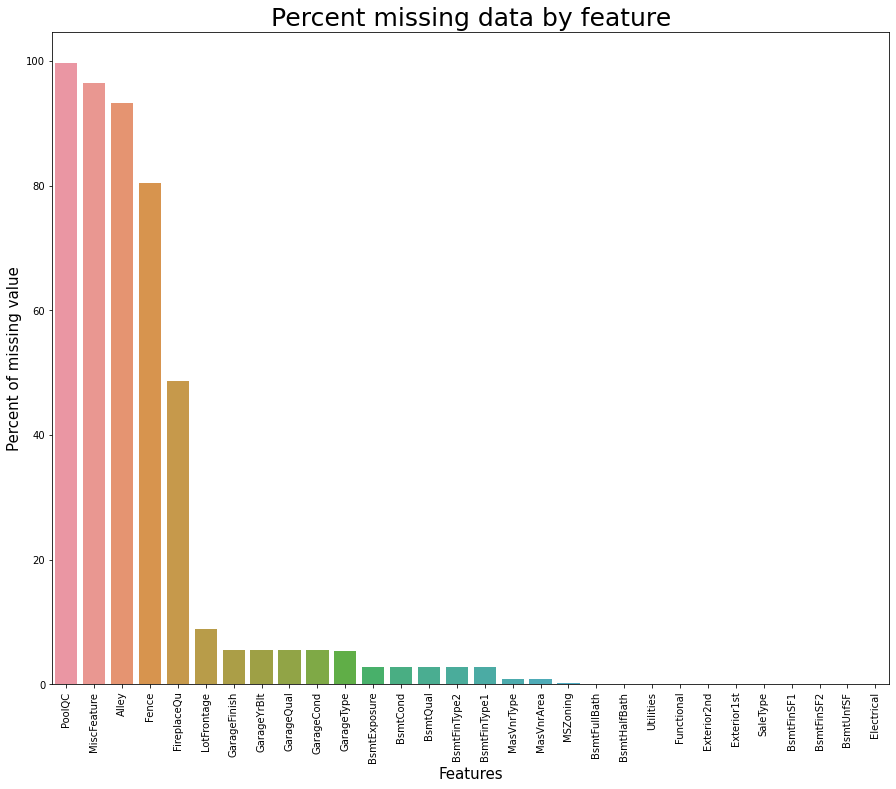

In [65]:
# plotting missing values
plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=total_data_na.index, y=total_data_na)

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing value', fontsize=15)
plt.title('Percent missing data by feature', fontsize=25)

In [66]:
#poolQC - NA means no pool, so replacing with None
#Miscfeature - NA means no miscfeature, so replacing with None
#Alley - NA means no Alley access, so replacing with None
#Fence - NA means no fence, so replacing with None
#FireplaceQu - NA means no fireplace, so replacing with None

In [67]:
# Filling missing values with none values 
total_data["PoolQC"] = total_data["PoolQC"].fillna("None")
total_data["MiscFeature"] = total_data["MiscFeature"].fillna("None")
total_data["Alley"] = total_data["Alley"].fillna("None")
total_data["Fence"] = total_data["Fence"].fillna("None")
total_data["FireplaceQu"] = total_data["FireplaceQu"].fillna("None")

In [68]:
# Area of each street is connected so replacing missing value with median
total_data["LotFrontage"]=total_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [69]:
# replacing with most frequent value in the column which is None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total_data[col] =total_data[col].fillna('None')

In [70]:
# Replacing missing with 0 (No garage = no cars in such garage)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)

In [71]:
# Missing value in these feature means no basement (replace with 0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total_data[col] = total_data[col].fillna(0)

In [72]:
# NaN means in these column is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total_data[col] = total_data[col].fillna('None')

In [73]:
# NA means no masonry veneer for houses. (Fill zero for area and None for type)
total_data["MasVnrType"] = total_data["MasVnrType"].fillna("None")
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna(0)

# Filling MSZoning with most common value 'RL'
total_data['MSZoning'] = total_data['MSZoning'].fillna(total_data['MSZoning'].mode()[0])

# For Utilitites, most of the records are 'AllPub'. It won't help in prediction
total_data = total_data.drop(['Utilities'], axis=1)

# data description says- Assume typical(Typ) unless deductions are warranted
total_data["Functional"] = total_data["Functional"].fillna("Typ")

# replacing with most repeated "SBrkr" value
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode()[0])

# set "TA" most frequent in place of missing value
total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode()[0])

# replacing with most common value 
total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])
total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])

# replacing with most common value again
total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])

# MSSubClass-type of dwelling, NA means no building class. (fill with None)
total_data['MSSubClass'] = total_data['MSSubClass'].fillna("None")

In [74]:
#Check remaining missing values if any 
total_data_na = (total_data.isnull().sum()/len(total_data))*100
total_data_na = total_data_na.drop(total_data_na[total_data_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({"missing ratio":total_data_na})
missing_data.head()

,missing ratio


In [75]:
# Converting some column feature who are int but should be str

total_data['MSSubClass'].dtype, total_data['YrSold'].dtype

(dtype('int64'), dtype('int64'))

In [76]:
#MSSubClass=The building class
total_data['MSSubClass'] = total_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
total_data['OverallCond'] = total_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
total_data['YrSold'] = total_data['YrSold'].astype(str)
total_data['MoSold'] = total_data['MoSold'].astype(str)

In [77]:
# process columns, apply LabelEncoder to categorical features
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(total_data[c].values))
    total_data[c] = lbl.transform(list(total_data[c].values))
# shape        
print('Shape all_data: {}'.format(total_data.shape))

Shape all_data: (2917, 78)


In [78]:
# Adding one extra feature -> total sqfootage feature 
total_data['TotalSF'] = total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF']

In [79]:
# Checking numerical feature again
numeric_feats = total_data.dtypes[total_data.dtypes != 'object' ].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'TotalSF'],
      dtype='object')

In [80]:
# Checking skewness level on numerical features to remove
skewed_feats = total_data[numeric_feats].apply(lambda x: skew(x.dropna())).\
sort_values(ascending=False)
skewness = pd.DataFrame({"Skewness ": skewed_feats})
skewness.head()

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.058210
LowQualFinSF,12.084539
3SsnPorch,11.372080


In [81]:
# Applying boxcox on those features having skewness > 0.75
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    total_data[feat] = boxcox1p(total_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [82]:
total_data.shape

(2917, 79)

In [83]:
# Coverting features into dummies for expanding
# dimensions for convenient access
total_data = pd.get_dummies(total_data)
print(total_data.shape)

(2917, 220)


In [84]:
# Converting total data back to train and test
train = total_data[:train_range]
test = total_data[train_range:]
train.shape

(1458, 220)

In [85]:
#pip install xgboost

In [86]:
# Importing different models to try on our dataset
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [87]:
n_folds = 5
# defining our own function to get root
# mean square value using 5 fold split
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [88]:
# Passing RobustScaler() to make the lasso model more robust to outlier
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

In [89]:
# Passing RobustScaler() to make the Enet model more robust to outlier
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,
                                                l1_ratio=.9, random_state=3))

In [90]:
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [91]:
# passing huber loss to make it robust to outliers
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [92]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [93]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1172 (0.0134)



In [94]:
score = rmsle_cv(Enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1172 (0.0135)



In [95]:
score = rmsle_cv(krr)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1209 (0.0133)



In [96]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1214 (0.0151)



In [97]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[18:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

##Stacking of models

In [98]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X)
                                       for model in self.models_])
        return np.mean(predictions, axis=1)


In [99]:
# Averaging the score
averaged_models = AveragingModels(models = (Enet, GBoost, krr, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1141 (0.0137)



In [100]:
#Stacking using a meta model
#Approach - we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

In [101]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [102]:
# Averaging the score again
stacked_averaged_models = StackingAveragedModels(base_models = (Enet, GBoost, krr),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1135 (0.0137)


In [103]:
# defined function to get rmse
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [104]:
# Fitting the stacked model and predicting
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.08138237412350122


In [105]:
# xgb model prediction
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[18:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.0795467625401269


In [106]:
#ensembling the model
ensemble = stacked_pred*0.70 + xgb_pred*0.30

In [107]:
# creating submission file
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)